# Permutation Feature Importance
## TAIC 2 - Atividade 2

Autor: João Vitor Mergulhão

Base de dados usada na atividade: https://archive.ics.uci.edu/dataset/145/statlog+heart

In [21]:
!pip install ucimlrepo

In [36]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

## Importar e Preparar Dados

In [23]:
# fetch dataset
statlog_heart = fetch_ucirepo(id=145)

# data (as pandas dataframes)
X = statlog_heart.data.features
y = statlog_heart.data.targets

In [24]:
df = pd.concat([X, y], axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   270 non-null    float64
 1   sex                   270 non-null    float64
 2   chest-pain            270 non-null    float64
 3   rest-bp               270 non-null    float64
 4   serum-chol            270 non-null    float64
 5   fasting-blood-sugar   270 non-null    float64
 6   electrocardiographic  270 non-null    float64
 7   max-heart-rate        270 non-null    float64
 8   angina                270 non-null    float64
 9   oldpeak               270 non-null    float64
 10  slope                 270 non-null    float64
 11  major-vessels         270 non-null    float64
 12  thal                  270 non-null    float64
 13  heart-disease         270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


In [94]:
from sklearn.model_selection import train_test_split

X = df.drop('heart-disease', axis=1)
y = df['heart-disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## PFI dos Modelos


In [37]:
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()

knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
models = {
    'KNN': knn_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model
}

In [81]:
def calculate_PFI(model, X, y):
  result = permutation_importance(model, X, y,n_repeats=100, random_state=2)

  importances = pd.DataFrame({'importances_mean': result.importances_mean,
                'importances_std':result.importances_std,
                'feature': X.columns})

  return importances

def plot_PFI(importances, model_name):
  fig, ax = plt.subplots()

  importances.plot.bar(x='feature', y='importances_mean', yerr='importances_std', ax=ax)

  ax.set_title(f"Permutation Feature importance on {model_name}")
  ax.set_ylabel("Mean accuracy decrease")
  fig.tight_layout()
  plt.show()

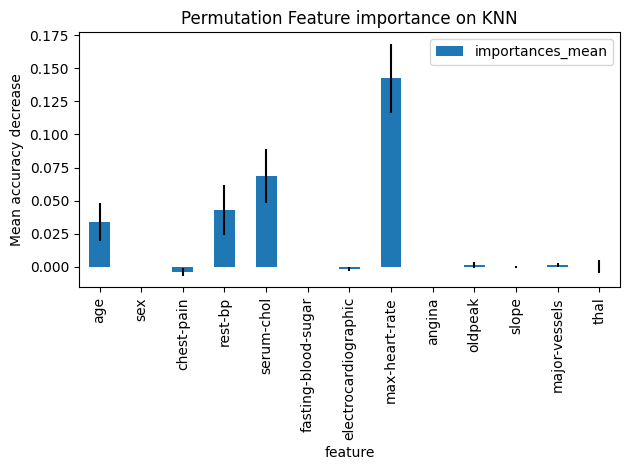

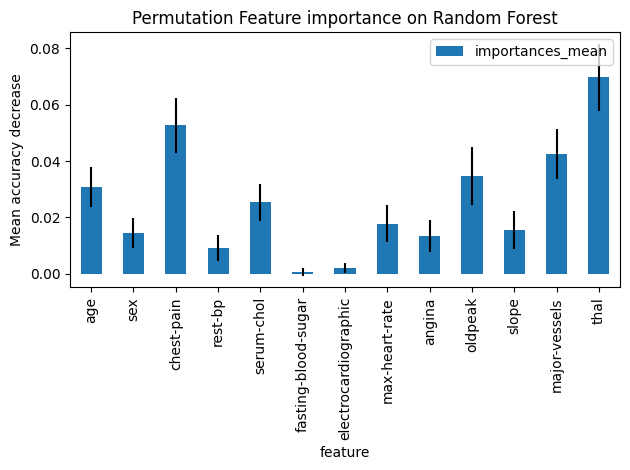

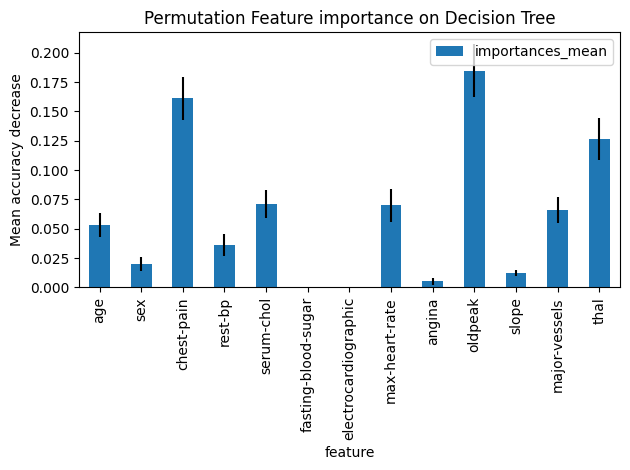

In [83]:
for model_name, model in models.items():
  importances = calculate_PFI(model, X, y)
  plot_PFI(importances, model_name)

## PFI do Random Forest - Dividindo os dados por Gênero

In [68]:
X_test_sex0 = X_test[X_test['sex']==0]
y_test_sex0 = y_test[X_test['sex']==0]

X_test_sex1 = X_test[X_test['sex']==1]
y_test_sex1 = y_test[X_test['sex']==1]

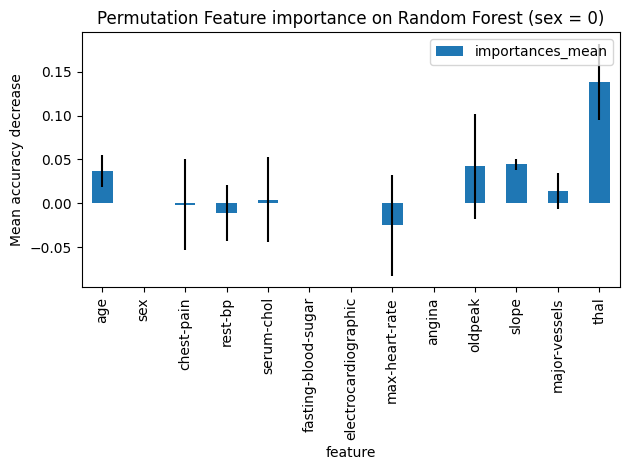

In [89]:
importances_rf_sex0 = calculate_PFI(model, X_test_sex0, y_test_sex0)
plot_PFI(importances_rf_sex0, "Random Forest (sex = 0)")

In [91]:
importances_rf_sex0.sort_values(by='importances_mean', ascending=False)

,importances_mean,importances_std,feature
12,0.138182,0.043561,thal
10,0.044545,0.006364,slope
9,0.042273,0.060046,oldpeak
0,0.036818,0.017832,age
11,0.014091,0.021022,major-vessels
4,0.004091,0.048573,serum-chol
6,0.000000,0.000000,electrocardiographic
1,0.000000,0.000000,sex
8,0.000000,0.000000,angina
5,0.000000,0.000000,fasting-blood-sugar


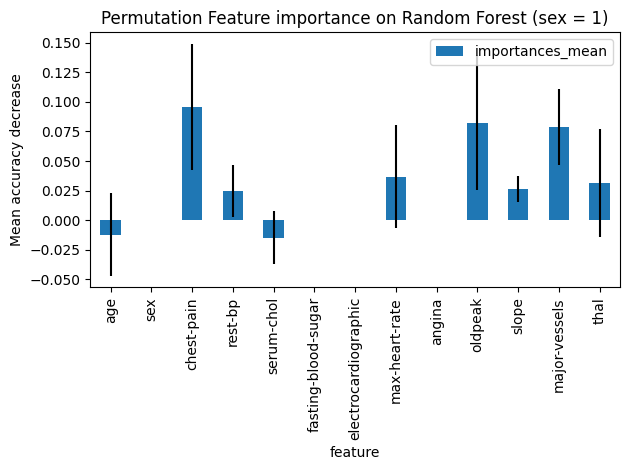

In [92]:
importances_rf_sex1 = calculate_PFI(model, X_test_sex1, y_test_sex1)
plot_PFI(importances_rf_sex1, "Random Forest (sex = 1)")

In [93]:
importances_rf_sex1.sort_values(by='importances_mean', ascending=False)

,importances_mean,importances_std,feature
2,0.095937,0.053080,chest-pain
9,0.082500,0.057200,oldpeak
11,0.078750,0.032016,major-vessels
7,0.036875,0.043835,max-heart-rate
12,0.031250,0.045501,thal
10,0.026562,0.011158,slope
3,0.024688,0.021783,rest-bp
1,0.000000,0.000000,sex
8,0.000000,0.000000,angina
5,0.000000,0.000000,fasting-blood-sugar


## Conclusão

Os PFIs mudam muito de acordo com o modelo, o que indica que a influência de uma feature depende fortemente do algoritmo escolhido. Além disso, em um mesmo modelo, os PFIs também são distintos de acordo com a população analisada, como foi observado no experimento com o Random Forest.


Ao dividirmos os dados de teste por gênero (coluna sex na tabela) e calcularmos os PFis com o Random Forest, obtemos os seguintes resultados:

- Para sex = 0:
  - As 3 features com maior PFI: chest-pain, oldpeak, major-vessels
  - As 3 features com menor PFI: max-heart-rate, rest-bp, chest-pain


- Para sex = 1:
  - As 3 features com maior PFI para sex = 1: chest-pain, oldpeak, major-vessels
  - As 3 features com menor PFI: serum-chol, age, electrocardiographic

